#  Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%mtplotlib inline

UsageError: Line magic function `%mtplotlib` not found.


In [2]:
import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [3]:
df1=pd.read_csv('Hr_data.csv')
df1.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [4]:
df2=pd.read_excel('Hr_data1.xlsx')

Here we have two dataset files , so basically we merge those two files .

In [5]:
data=pd.concat([df1,df2],axis=1)
data.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,1003,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,1005,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,1486,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,1038,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,1057,0.37,0.52


# Exploratory data analysis¶

In [6]:
data.shape

(14999, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            14999 non-null  int64  
 1   number_project         14999 non-null  int64  
 2   average_montly_hours   14999 non-null  int64  
 3   time_spend_company     14999 non-null  int64  
 4   Work_accident          14999 non-null  int64  
 5   left                   14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   EMPLOYEE #             14999 non-null  int64  
 10  satisfaction_level     14972 non-null  float64
 11  last_evaluation        14972 non-null  float64
dtypes: float64(2), int64(8), object(2)
memory usage: 1.4+ MB


In [8]:
data.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,EMPLOYEE #,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,45424.627575,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,25915.900127,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1003.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,22872.500000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,45448.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,67480.500000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,99815.000000,1.000000,1.000000


# Summary of variables

There are 11 variables in the dataset.

9 are continuous variables and 2 variable are categoricals,need to change in numeric type.

Here our left variable is target variable rest of all idependent variable.

leave company=1 / Not leave=0

There are some missing values in the dataset,need to solve.

In [9]:
data.drop(['employee_id','EMPLOYEE #'],axis=1,inplace=True)

In [10]:
data.shape

(14999, 10)

# Explore missing values in variables


In [11]:
data.isnull().sum()

number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
department                0
salary                    0
satisfaction_level       27
last_evaluation          27
dtype: int64

 # Filling missing values

 We see there are missing values in our dataset ,so need to handle them.

 Here missing values are in numerical variable so we can replace it with mean/median.

In [12]:
data['satisfaction_level'].fillna(data['satisfaction_level'].mean(),inplace=True)
data['last_evaluation'].fillna(data['satisfaction_level'].mean(),inplace=True)

In [13]:
data.isnull().sum().sum()

0

In [14]:
data['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

<AxesSubplot:>

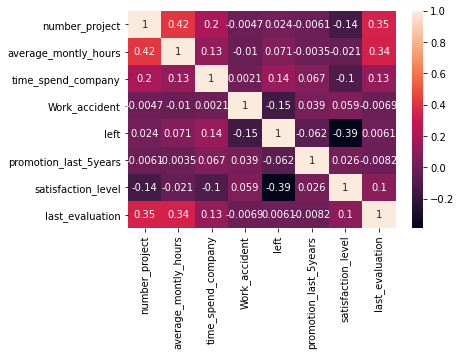

In [15]:
sns.heatmap(data.corr(),annot=True)

<AxesSubplot:xlabel='department', ylabel='count'>

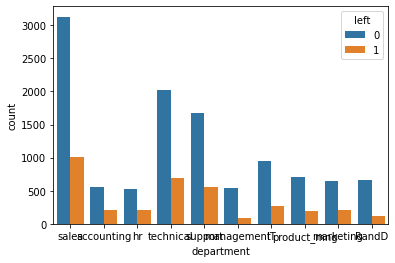

In [16]:
sns.countplot(data=data,x='department',hue='left')

<AxesSubplot:xlabel='salary', ylabel='count'>

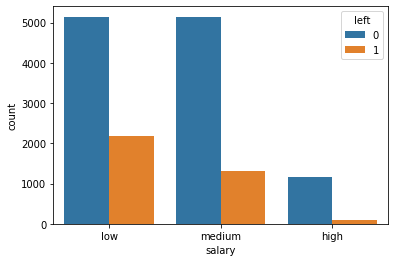

In [17]:
sns.countplot(data=data,x='salary',hue='left')

# Check distribution of variables on Distplot

<AxesSubplot:xlabel='last_evaluation', ylabel='Density'>

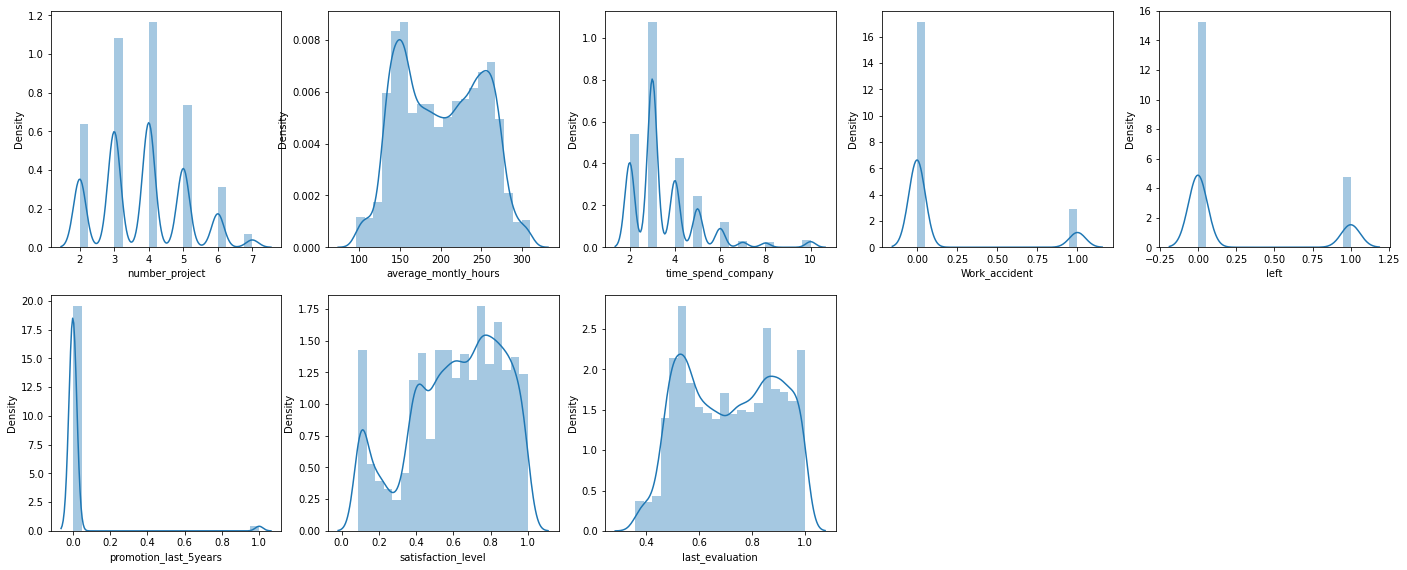

In [18]:
plt.figure(figsize=(24,20))

plt.subplot(4, 5, 1)
sns.distplot(data['number_project'],bins=20)

plt.subplot(4, 5, 2)
sns.distplot(data['average_montly_hours'],bins=20)

plt.subplot(4, 5, 3)
sns.distplot(data['time_spend_company'],bins=20)

plt.subplot(4, 5, 4)
sns.distplot(data['Work_accident'],bins=20)

plt.subplot(4, 5, 5)
sns.distplot(data['left'],bins=20)

plt.subplot(4, 5, 6)
sns.distplot(data['promotion_last_5years'],bins=20)

plt.subplot(4, 5, 7)
sns.distplot(data['satisfaction_level'],bins=20)

plt.subplot(4, 5, 8)
sns.distplot(data['last_evaluation'],bins=20)


<AxesSubplot:xlabel='salary', ylabel='promotion_last_5years'>

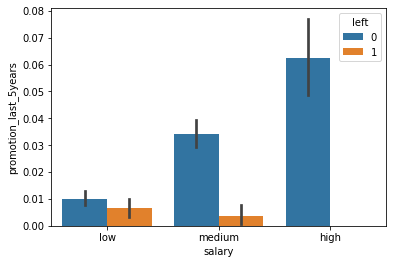

In [19]:
sns.barplot(data=data,x='salary',y='promotion_last_5years',hue='left')

In [20]:
data['department'].nunique()

10

In [21]:
data['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [22]:
data['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

# Declare feature variables and target variable

In [23]:
x=data.drop(['left'],axis=1)
x.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,0,sales,low,0.38,0.53
1,5,262,6,0,0,sales,medium,0.80,0.86
2,7,272,4,0,0,sales,medium,0.11,0.88
3,5,223,5,0,0,sales,low,0.72,0.87
4,2,159,3,0,0,sales,low,0.37,0.52


In [24]:
y=data['left']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

# Split data into Training and Testing

## We use train_test_split before Feature Engineering

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=10)

In [26]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((11999, 9), (3000, 9), (11999,), (3000,))

In [27]:
x_train.reset_index(inplace=True)
x_test.reset_index(inplace=True)

In [28]:
x_train.head()

,index,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,13388,4,260,3,0,0,product_mng,medium,0.85,0.81
1,6481,2,187,6,0,0,RandD,medium,0.77,0.74
2,1494,3,188,4,0,0,technical,low,0.17,0.75
3,2518,4,175,2,0,0,sales,medium,0.63,0.98
4,9958,5,179,3,0,0,hr,low,0.91,0.59


In [29]:
x_test.head()

,index,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,13982,5,125,4,0,0,sales,low,0.65,0.40
1,822,2,128,3,0,0,management,low,0.41,0.50
2,13751,3,125,7,0,0,sales,medium,0.44,0.41
3,9656,5,190,5,0,0,technical,medium,0.93,0.44
4,13497,4,170,6,0,0,sales,medium,0.76,0.82


# Feature Engineering
 In Feature Engineering we have to do conversion of categorical variable to numerical variable.
 
 SO, there are two categorical variable in our dataset in which, 
 
 applying OrdinalEncoding on Salary variable &  Applying OneHotEncoding on Department variable. 

In [30]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

##### Ordinal Encoding

In [31]:
oe=OrdinalEncoder(categories=[['low','medium','high']])

In [32]:
X_train= oe.fit_transform(x_train[['salary']])

X_test = oe.transform(x_test[['salary']])

In [33]:
oe_train=pd.DataFrame(X_train)

oe_test=pd.DataFrame(X_test)

In [34]:
x_train=pd.concat([x_train,oe_train],axis=1,join='inner')
x_train

,index,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,satisfaction_level,last_evaluation,0
0,13388,4,260,3,0,0,product_mng,medium,0.85,0.81,1.0
1,6481,2,187,6,0,0,RandD,medium,0.77,0.74,1.0
2,1494,3,188,4,0,0,technical,low,0.17,0.75,0.0
3,2518,4,175,2,0,0,sales,medium,0.63,0.98,1.0
4,9958,5,179,3,0,0,hr,low,0.91,0.59,0.0
...,...,...,...,...,...,...,...,...,...,...,...
11994,11633,4,269,10,0,0,management,high,0.77,0.89,2.0
11995,1344,2,150,3,0,0,support,low,0.39,0.57,0.0
11996,12815,3,236,3,1,0,RandD,low,0.80,0.67,0.0
11997,7293,4,152,2,0,0,technical,medium,0.97,0.64,1.0


In [35]:
x_test=pd.concat([x_test,oe_test],axis=1,join='inner')
x_test

,index,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,satisfaction_level,last_evaluation,0
0,13982,5,125,4,0,0,sales,low,0.65,0.40,0.0
1,822,2,128,3,0,0,management,low,0.41,0.50,0.0
2,13751,3,125,7,0,0,sales,medium,0.44,0.41,1.0
3,9656,5,190,5,0,0,technical,medium,0.93,0.44,1.0
4,13497,4,170,6,0,0,sales,medium,0.76,0.82,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2995,3876,4,183,3,0,0,IT,low,0.54,0.53,0.0
2996,11504,3,150,3,0,0,support,low,0.70,0.68,0.0
2997,2435,6,130,6,1,0,RandD,low,0.21,0.70,0.0
2998,5161,4,142,3,0,0,support,medium,0.85,0.49,1.0


##### One-Hot Encoding

In [36]:
ohe=OneHotEncoder(sparse=False,drop='first')

In [37]:
pd.DataFrame(ohe.fit_transform(x_train[['department']]))

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
11994,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [38]:
new_col=ohe.get_feature_names()
new_col

array(['x0_RandD', 'x0_accounting', 'x0_hr', 'x0_management',
       'x0_marketing', 'x0_product_mng', 'x0_sales', 'x0_support',
       'x0_technical'], dtype=object)

In [39]:
ohe_train=pd.DataFrame(ohe.fit_transform(x_train[['department']]),columns=new_col)
ohe_train

,x0_RandD,x0_accounting,x0_hr,x0_management,x0_marketing,x0_product_mng,x0_sales,x0_support,x0_technical
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
11994,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [40]:
x_train=pd.concat([x_train,ohe_train],axis=1,join='inner')
x_train

,index,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,satisfaction_level,last_evaluation,0,x0_RandD,x0_accounting,x0_hr,x0_management,x0_marketing,x0_product_mng,x0_sales,x0_support,x0_technical
0,13388,4,260,3,0,0,product_mng,medium,0.85,0.81,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,6481,2,187,6,0,0,RandD,medium,0.77,0.74,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1494,3,188,4,0,0,technical,low,0.17,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2518,4,175,2,0,0,sales,medium,0.63,0.98,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,9958,5,179,3,0,0,hr,low,0.91,0.59,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11994,11633,4,269,10,0,0,management,high,0.77,0.89,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11995,1344,2,150,3,0,0,support,low,0.39,0.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11996,12815,3,236,3,1,0,RandD,low,0.80,0.67,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11997,7293,4,152,2,0,0,technical,medium,0.97,0.64,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [41]:
x_train.drop(['index','department','salary'],axis=1,inplace=True)

In [42]:
#Transform on Testing data
pd.DataFrame(ohe.transform(x_test[['department']]))

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [43]:
ohe_test=pd.DataFrame(ohe.transform(x_test[['department']]),columns=new_col)
ohe_test

,x0_RandD,x0_accounting,x0_hr,x0_management,x0_marketing,x0_product_mng,x0_sales,x0_support,x0_technical
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [44]:
x_test=pd.concat([x_test,ohe_test],axis=1,join='inner')
x_test

,index,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,satisfaction_level,last_evaluation,0,x0_RandD,x0_accounting,x0_hr,x0_management,x0_marketing,x0_product_mng,x0_sales,x0_support,x0_technical
0,13982,5,125,4,0,0,sales,low,0.65,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,822,2,128,3,0,0,management,low,0.41,0.50,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,13751,3,125,7,0,0,sales,medium,0.44,0.41,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,9656,5,190,5,0,0,technical,medium,0.93,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,13497,4,170,6,0,0,sales,medium,0.76,0.82,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,3876,4,183,3,0,0,IT,low,0.54,0.53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2996,11504,3,150,3,0,0,support,low,0.70,0.68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2997,2435,6,130,6,1,0,RandD,low,0.21,0.70,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2998,5161,4,142,3,0,0,support,medium,0.85,0.49,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
x_test.drop(['index','department','salary'],axis=1,inplace=True)

In [46]:
print(x_train.shape)
x_test.shape

(11999, 17)


(3000, 17)

## Check Accuracy of RF with default parameter 
#### We use RF with Default n_estimators(i.e-100 Decision Trees )

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=2)

In [48]:
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=2)

In [49]:
y_pred=rf.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

# Check Accuracy 

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [51]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[2264    2]
 [  41  693]]
0.9856666666666667
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2266
           1       1.00      0.94      0.97       734

    accuracy                           0.99      3000
   macro avg       0.99      0.97      0.98      3000
weighted avg       0.99      0.99      0.99      3000



In [78]:
from sklearn.ensemble import RandomForestClassifier
rf_50=RandomForestClassifier(n_estimators=5,random_state=50)

rf_50.fit(x_train,y_train)

y_pred_50=rf_50.predict(x_test)
y_pred_50

accuracy_score(y_test,y_pred_50)

0.978

##### The model accuracy score with 5 decision-trees is 0.978 but the same with 100 decision-trees is 0.9856. So, as expected accuracy increases with number of decision-trees in the model.

In [53]:
# Training Accuracy 
train_score=rf.score(x_train,y_train)
train_score

1.0

In [54]:
# Testing Accuracy
test_score=rf.score(x_test,y_test)
test_score

0.9856666666666667

 The training-set accuracy score is 0.1 while the test-set accuracy to be 0.986. So, there is overfitting,as random forest solve problem of Overfitting.

# ROC_AUC Score

In [55]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred)
ROC_AUC

0.9716295384200996

ROC_AUC Score reduce score for our model

In [56]:
from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(rf, x_train, y_train, cv=5).mean()
Cross_validated_ROC_AUC

0.9878324301792414

As i try both KFold & StratifiedKFold but they not give that much result compared to cross_val_score.

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=300,random_state=2)

In [59]:
parameters = [
     {'criterion': ['entropy','gini'],    
      'max_features': ['auto','log2','sqrt'],
      'max_depth': [8, 5, 14, 16, 22],
      'max_leaf_nodes':[8, 12, 20, 23],
      'min_samples_split':[2, 4, 6, 8]}
]

Grid_search = GridSearchCV(estimator = rf,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 4,
                           verbose=1,
                           n_jobs=4)

Grid_search.fit(x_train,y_train)

Fitting 4 folds for each of 480 candidates, totalling 1920 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(n_estimators=300, random_state=2),
             n_jobs=4,
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': [8, 5, 14, 16, 22],
                          'max_features': ['auto', 'log2', 'sqrt'],
                          'max_leaf_nodes': [8, 12, 20, 23],
                          'min_samples_split': [2, 4, 6, 8]}],
             scoring='accuracy', verbose=1)

In [60]:
Grid_search.best_score_

0.9756645270645772

In [61]:
Grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 14,
 'max_features': 'auto',
 'max_leaf_nodes': 23,
 'min_samples_split': 8}

In [62]:
Grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=14, max_leaf_nodes=23,
                       min_samples_split=8, n_estimators=300, random_state=2)

In [63]:
Grid_search.score(x_test, y_test)

0.968

In [64]:
Grid_search.score(x_train, y_train)

0.9764147012251021

### Here GridSearch Solve the problem of Overfitting .

# Feature Importance

Now, I will use the feature importance method to see feature scores.

In [65]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf.feature_importances_

array([0.17617295, 0.1613137 , 0.19059783, 0.00939476, 0.00193739,
       0.30046435, 0.12956183, 0.01294927, 0.00167174, 0.00136208,
       0.00160248, 0.00177903, 0.00126857, 0.00086399, 0.00303458,
       0.00289824, 0.0031272 ])

In [66]:
feature_scores = pd.Series(rf.feature_importances_, index=x_train.columns).sort_values(ascending=False)

feature_scores

satisfaction_level       0.300464
time_spend_company       0.190598
number_project           0.176173
average_montly_hours     0.161314
last_evaluation          0.129562
0                        0.012949
Work_accident            0.009395
x0_technical             0.003127
x0_sales                 0.003035
x0_support               0.002898
promotion_last_5years    0.001937
x0_management            0.001779
x0_RandD                 0.001672
x0_hr                    0.001602
x0_accounting            0.001362
x0_marketing             0.001269
x0_product_mng           0.000864
dtype: float64

 We can see that the most important feature is satisfaction_level and least important feature is x0_product_mng.
 
 So we can also increase model accuracy by removing less important feature,but here our model doing very well so we not do anything.

## Prediction on new data

In [67]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [68]:
input_data = (4,260,3,0,0,0.85,0.81,1.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('Employee will Not Quit the Company')
else:
  print('Employee will Quit the Company')

[0]
Employee will Not Quit the Company


# Results and Conclusion

1.In this project, I build a Random Forest Classifier to predict which of your Employee will Quit the Company. I build two models, one with 10 decision-trees and another one with 100 decision-trees.

2.The model accuracy score with 5 decision-trees is 0.978 but the same with 100 decision-trees is 0.9856. So, as expected accuracy increases with number of decision-trees in the model.

3.In this implementation i used different Scoring technique, among all that we get maximum accuracy using cross-validation Score with cv=5 and the accuracy is **0.9878**.

So,ROC-AUC of our model is very close to 1. Now, we can conclude that our classifier does a good job in predicting class.

4.I have also used the Random Forest model to find the important features for our model,in that we see satisfaction_level is very important for our model.GridSearchCV not help that much.

6.WE also solve the Problem of Overfitting for our model.